In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data_assets = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name="descriptions")
data_total = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name="total returns")
data_excess = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name="excess returns")
data_excess.drop(columns='Date', inplace=True)

# 2.1 Summary Statistics

## (a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

In [ ]:
excess_return_monthly_mean = pd.DataFrame(data_excess.mean()).rename(columns={0:"monthly_mean"})
excess_return_monthly_vol = pd.DataFrame(data_excess.std()).rename(columns={0:"monthly_vol"})
excess_return_figures = excess_return_monthly_mean.join(excess_return_monthly_vol, how='outer')
excess_return_figures['mean_annualized'] = excess_return_figures['monthly_mean']*12
excess_return_figures['vol_annualized'] = excess_return_figures['monthly_vol']*np.sqrt(12)

<Axes: >

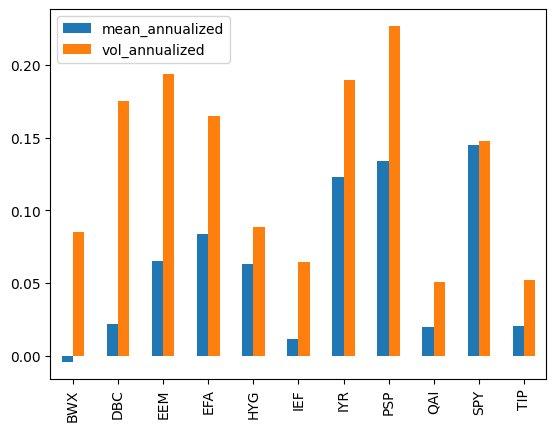

In [ ]:
excess_return_figures.plot.bar(y=['mean_annualized', 'vol_annualized'], use_index=True)

In [ ]:
excess_return_figures

,monthly_mean,monthly_vol,mean_annualized,vol_annualized
BWX,-0.000378,0.024648,-0.004532,0.085384
DBC,0.001824,0.050653,0.021884,0.175468
EEM,0.005414,0.056062,0.064970,0.194206
EFA,0.006985,0.047579,0.083817,0.164818
HYG,0.005242,0.025488,0.062909,0.088292
IEF,0.000937,0.018559,0.011250,0.064291
IYR,0.010229,0.054794,0.122743,0.189811
PSP,0.011197,0.065526,0.134369,0.226988
QAI,0.001614,0.014705,0.019373,0.050940
SPY,0.012094,0.042692,0.145133,0.147890


## (b) Which assets have the best and worst Sharpe ratios?

In [ ]:
excess_return_figures['monthly_sharpe'] = excess_return_figures['monthly_mean'] / excess_return_figures['monthly_vol']
excess_return_figures['sharpe_annualized'] = excess_return_figures['monthly_sharpe']*np.sqrt(12)

In [ ]:
excess_return_figures['sharpe_annualized']

BWX   -0.053080
DBC    0.124717
EEM    0.334541
EFA    0.508542
HYG    0.712512
IEF    0.174981
IYR    0.646659
PSP    0.591964
QAI    0.380306
SPY    0.981357
TIP    0.390955
Name: sharpe_annualized, dtype: float64

**1b ANSWER**: SPY has the highest Sharpe Ratio from our data with a value of ~0.98. BWX has the lowest Sharpe Ratio from our data with a value of ~-0.053.

# 2.2 Descriptive Analysis

## (a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

[]

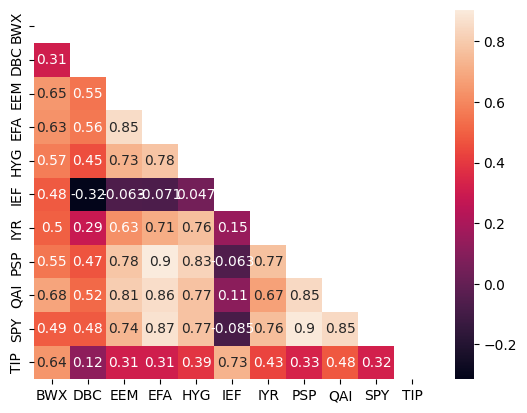

In [ ]:
#CREDIT: Used this G4G link to provide a mask for the heatmap to triangulate it (readability)

excess_ret_corr = data_excess.corr()
mask = np.triu(np.ones_like(excess_ret_corr))

#CREDIT: Used Seaborn docs for reference (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
sn.heatmap(excess_ret_corr, annot=True, mask=mask).set()

In [ ]:
excess_ret_corr

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.313258,0.647129,0.632233,0.574586,0.483613,0.497961,0.553404,0.680774,0.488523,0.637803
DBC,0.313258,1.000000,0.548695,0.559622,0.454801,-0.315121,0.289199,0.468025,0.520341,0.483189,0.122723
EEM,0.647129,0.548695,1.000000,0.852263,0.727496,-0.063252,0.627361,0.784057,0.809325,0.735565,0.313342
EFA,0.632233,0.559622,0.852263,1.000000,0.776654,-0.071464,0.707384,0.904622,0.858914,0.874924,0.311744
HYG,0.574586,0.454801,0.727496,0.776654,1.000000,0.046662,0.763390,0.826871,0.773005,0.774027,0.389613
IEF,0.483613,-0.315121,-0.063252,-0.071464,0.046662,1.000000,0.147228,-0.062593,0.111315,-0.084812,0.725957
IYR,0.497961,0.289199,0.627361,0.707384,0.763390,0.147228,1.000000,0.770262,0.672907,0.761533,0.429716
PSP,0.553404,0.468025,0.784057,0.904622,0.826871,-0.062593,0.770262,1.000000,0.846007,0.898974,0.331239
QAI,0.680774,0.520341,0.809325,0.858914,0.773005,0.111315,0.672907,0.846007,1.000000,0.846063,0.477704
SPY,0.488523,0.483189,0.735565,0.874924,0.774027,-0.084812,0.761533,0.898974,0.846063,1.000000,0.321820


**2a ANSWER**: PSP and EFA have the greatest degree of correlation with 0.904622, IEF and HYG have the lowest degree of correlation with 0.046662

## (b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

In [ ]:
excess_return_figures['mean_annualized'].sort_values(ascending=False)

SPY    0.145133
PSP    0.134369
IYR    0.122743
EFA    0.083817
EEM    0.064970
HYG    0.062909
DBC    0.021884
TIP    0.020233
QAI    0.019373
IEF    0.011250
BWX   -0.004532
Name: mean_annualized, dtype: float64

In [ ]:
excess_return_figures['vol_annualized'].sort_values(ascending=False)

PSP    0.226988
EEM    0.194206
IYR    0.189811
DBC    0.175468
EFA    0.164818
SPY    0.147890
HYG    0.088292
BWX    0.085384
IEF    0.064291
TIP    0.051752
QAI    0.050940
Name: vol_annualized, dtype: float64

**2b ANSWER**: The 2.02% annualized mean external returns of TIPS (based on TIP) outperforms that of domestic bonds (IEF with 1.12%) and foreign bonds (BWX with -0.45%) in the sample. TIP also has a lower volatility than IEF and BWX, meaning it has the highest Sharpe ratio of the three. Therefore, it outperforms the other bonds.

## (c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

**2c ANSWER**: Based on their superior returns in the sample to foreign and domestic bonds, as well as their decently higher sharpe ratio indicating higher risk-adjusted returns, and their protection against inflation, TIPS may expand the investment opportunity set. However, one consideration one might make is that TIPS have signifiant correlation with these two bonds.

# 2.3 The MV Frontier

## (a) Compute and display the weights of the tangency portfolios

In [ ]:
mean_rets = excess_return_figures['mean_annualized']
cov_matrix = data_excess.cov()
inv_cov = np.linalg.inv(cov_matrix)
ones = np.ones(mean_rets.shape)

w_tan = (inv_cov @ mean_rets) / (ones.T @ inv_cov @ mean_rets)
w_tan_df = pd.DataFrame(w_tan, index=data_excess.columns, columns=["Tangency Portfolio"])
display(w_tan_df.sort_values(by="Tangency Portfolio", ascending=False))

w_tan_rets = data_excess @ w_tan_df
w_tan_stats = {}
w_tan_stats["Annualized Mean"] = w_tan_rets.mean() * 12
w_tan_stats["Annualized Vol"] = w_tan_rets.std() * np.sqrt(12)
w_tan_stats["Annualized Sharpe Ratio"] = w_tan_stats["Annualized Mean"] / w_tan_stats["Annualized Vol"]
display(pd.DataFrame(w_tan_stats))

,Tangency Portfolio
SPY,69.900939
IEF,62.959134
HYG,34.746935
EEM,10.018155
TIP,5.451023
DBC,1.701262
EFA,0.512125
PSP,-11.528256
IYR,-12.366143
BWX,-46.264168


,Annualized Mean,Annualized Vol,Annualized Sharpe Ratio
Tangency Portfolio,8.812157,5.293389,1.664748


**3a ANSWER**: Weights as given above ^

## (b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to $w^{tan}$

**3b ANSWER**: Check 3a answer

# 2.4 The Allocation

## (a)  Compute and display the weights of MV portfolios with target returns of $\mu_p$ = .0075.

In [ ]:
# Credit: taken from solution for 2023
def performance_summary(rets, adj_factor=12):
    # Here, we use the keyword argument adj_factor to adjust the
    # annualization factor, which, since in this course we will
    # mainly deal with monthly data, is set to 12 by default.

    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)

In [ ]:
MU_TARGET = 0.0075
scaling = MU_TARGET / (data_excess.mean() @ w_tan)
print(f'Weight w_p with target returns 0.0075 is')
w_target = w_tan * scaling
w_target_df = pd.DataFrame(w_target, index=data_excess.columns, columns=["Targeted MV Portfolio"])
display(w_target_df.sort_values('Targeted MV Portfolio'))

Weight w_p with target returns 0.0075 is


,Targeted MV Portfolio
QAI,-1.165639
BWX,-0.472504
IYR,-0.126297
PSP,-0.117740
EFA,0.005230
DBC,0.017375
TIP,0.055672
EEM,0.102317
HYG,0.354876
IEF,0.643012


## (b) What is the mean, volatility, and Sharpe ratio for wp?

In [ ]:
performance_summary(data_excess @ w_target_df)


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Targeted MV Portfolio,0.09,0.054062,1.664748


## (c) Discuss the allocation. In which assets is the portfolio most long? And short?

The portfolio is most long in `SPY, IEF, HYG`, and most short in `QAI, BWX, IYR`. In particular, `QAI`'s short position is a lot more significant than `BWX`.

## (d) Does this line up with which assets have the strongest Sharpe ratios?

In [ ]:
performance_summary(data_excess).sort_values('Annualized Sharpe Ratio')

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
BWX,-0.004532,0.085384,-0.053080
DBC,0.021884,0.175468,0.124717
IEF,0.011250,0.064291,0.174981
EEM,0.064970,0.194206,0.334541
QAI,0.019373,0.050940,0.380306
TIP,0.020233,0.051752,0.390955
EFA,0.083817,0.164818,0.508542
PSP,0.134369,0.226988,0.591964
IYR,0.122743,0.189811,0.646659
HYG,0.062909,0.088292,0.712512


The result partially agrees with the individual annualized Sharpe ratio. In particular, `SPY` and `HYG` have the 2 highest Sharpe ratios, while `BWX` has the lowest Sharpe ratio, with `QAI` and `IYR` at 5th and 3rd worst. The most surprising is `IYR`, which has 3rd highest Sharpe, but our portfolio above shorts it.

# 2.5 Simple Portfolios

## (a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean $\mu_p = 0.0075$. Report its mean, volatility, and Sharpe ratio.

In [ ]:
w_equal = 0.0075 / np.sum(data_excess.mean()) * np.ones(len(data_excess.mean()))
w_equal_df = pd.DataFrame(w_equal, index=data_excess.columns, columns=["Equal Weights Portfolio"])
w_equal_df

,Equal Weights Portfolio
BWX,0.131936
DBC,0.131936
EEM,0.131936
EFA,0.131936
HYG,0.131936
IEF,0.131936
IYR,0.131936
PSP,0.131936
QAI,0.131936
SPY,0.131936


In [ ]:
performance_summary(data_excess @ w_equal_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Equal Weights Portfolio,0.09,0.15107,0.595752


## (b) Calculate the performance of the “risk-parity” portfolio over the sample.

In [ ]:
w_rp = 1/data_excess.std()
w_rp *= MU_TARGET / (data_excess.mean() @ w_rp)
w_rp_df = pd.DataFrame(w_rp, index=data_excess.columns, columns=["Risk-Parity Portfolio"])
w_rp_df

,Risk-Parity Portfolio
BWX,0.219895
DBC,0.107003
EEM,0.096679
EFA,0.113917
HYG,0.212652
IEF,0.292042
IYR,0.098917
PSP,0.082716
QAI,0.368585
SPY,0.126957


In [ ]:
performance_summary(data_excess @ w_rp_df)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Risk-Parity Portfolio,0.09,0.154956,0.580809


## (c) Compare

In [ ]:
pd.concat([w_target_df, w_equal_df, w_rp_df], axis = 1)

,Targeted MV Portfolio,Equal Weights Portfolio,Risk-Parity Portfolio
BWX,-0.472504,0.131936,0.219895
DBC,0.017375,0.131936,0.107003
EEM,0.102317,0.131936,0.096679
EFA,0.005230,0.131936,0.113917
HYG,0.354876,0.131936,0.212652
IEF,0.643012,0.131936,0.292042
IYR,-0.126297,0.131936,0.098917
PSP,-0.117740,0.131936,0.082716
QAI,-1.165639,0.131936,0.368585
SPY,0.713910,0.131936,0.126957


In [ ]:
pd.concat([performance_summary(data_excess @ w_target_df), performance_summary(data_excess @ w_equal_df), performance_summary(data_excess @ w_rp_df)], axis = 0).T

,Targeted MV Portfolio,Equal Weights Portfolio,Risk-Parity Portfolio
Annualized Mean,0.090000,0.090000,0.090000
Annualized Volatility,0.054062,0.151070,0.154956
Annualized Sharpe Ratio,1.664748,0.595752,0.580809


**5c ANSWER**: Clearly, the targeted MV portfolio achieves a higher Sharpe than the simpler models, such as equal weights and risk-parity.

# 2.6. Dropping TIPS

## Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And how much worse is the performance in 3.3?

In [ ]:
td_data = data_excess.drop(columns=['TIP'])

td_cov = td_data.cov()
td_mean_rets = td_data.mean()
td_invcov = np.linalg.inv(td_cov)
td_w_tan = (td_invcov @ td_mean_rets) / (np.ones(len(td_mean_rets)) @ np.linalg.inv(td_cov) @ td_mean_rets)

td_w_tan_df = pd.DataFrame(td_w_tan, index=td_data.columns, columns=["Tangency Portfolio Dropped TIP"])
display(td_w_tan_df.sort_values(by="Tangency Portfolio Dropped TIP", ascending=False))

td_w_tan_stats = pd.DataFrame(performance_summary(td_data @ td_w_tan_df))


,Tangency Portfolio Dropped TIP
SPY,270.600170
IEF,255.364181
HYG,133.862776
EEM,38.918291
DBC,8.030826
EFA,0.267703
PSP,-43.800488
IYR,-47.268401
BWX,-177.409652
QAI,-437.565405


In [ ]:
pd.concat([w_tan_df, td_w_tan_df], axis = 1)

,Tangency Portfolio,Tangency Portfolio Dropped TIP
BWX,-46.264168,-177.409652
DBC,1.701262,8.030826
EEM,10.018155,38.918291
EFA,0.512125,0.267703
HYG,34.746935,133.862776
IEF,62.959134,255.364181
IYR,-12.366143,-47.268401
PSP,-11.528256,-43.800488
QAI,-114.131006,-437.565405
SPY,69.900939,270.600170


In [ ]:
pd.concat([performance_summary(data_excess @ w_tan_df), performance_summary(td_data @ td_w_tan_df)], axis = 0).T

,Tangency Portfolio,Tangency Portfolio Dropped TIP
Annualized Mean,8.812157,33.933519
Annualized Volatility,5.293389,20.391340
Annualized Sharpe Ratio,1.664748,1.664114


**6 ANSWER**: When comparing the tangency portfolio with and without TIP, we see that the Sharpe is slightly higher with TIP, and this is expected, where adding an asset can only increase Sharpe (worst-case: set weight = 0). Some of the weights have naturally shifted a bit.

In [ ]:
MU_TARGET = 0.0075
td_scaling = MU_TARGET / (td_data.mean() @ td_w_tan)
print(f'Weight w_p with target returns 0.0075 is')
td_w_target = td_w_tan * td_scaling
td_w_target_df = pd.DataFrame(td_w_target, index=td_data.columns, columns=["Targeted MV Portfolio Dropped TIP"])

display(td_w_target_df.sort_values('Targeted MV Portfolio Dropped TIP', ascending=False))

td_w_target_stats = pd.DataFrame(performance_summary(td_data @ td_w_target_df))

Weight w_p with target returns 0.0075 is


,Targeted MV Portfolio Dropped TIP
SPY,0.717698
IEF,0.677288
HYG,0.355037
EEM,0.103221
DBC,0.021300
EFA,0.000710
PSP,-0.116170
IYR,-0.125367
BWX,-0.470534
QAI,-1.160531


In [ ]:
pd.concat([w_target_df, td_w_target_df], axis = 1)

,Targeted MV Portfolio,Targeted MV Portfolio Dropped TIP
BWX,-0.472504,-0.470534
DBC,0.017375,0.021300
EEM,0.102317,0.103221
EFA,0.005230,0.000710
HYG,0.354876,0.355037
IEF,0.643012,0.677288
IYR,-0.126297,-0.125367
PSP,-0.117740,-0.116170
QAI,-1.165639,-1.160531
SPY,0.713910,0.717698


In [ ]:
pd.concat([performance_summary(data_excess @ w_target_df), performance_summary(td_data @ td_w_target_df)], axis = 0).T

,Targeted MV Portfolio,Targeted MV Portfolio Dropped TIP
Annualized Mean,0.090000,0.090000
Annualized Volatility,0.054062,0.054083
Annualized Sharpe Ratio,1.664748,1.664114


**6 Answer cont.** The stats are extremely similar in the two situtations meaning that dropping TIP has not changed the mean, volatility, or Sharpe ratio much.